# Tarea 2 - Introducción a la Biomecánica
### Pregunta 2

In [388]:
# Importación de librerías

import numpy as np
import matplotlib.pyplot as plt

In [389]:
# Definición de parámetros

global L
global h
global R
global mu
global lambda_

L = 10
h = 1
R = 10
mu = 1
lambda_ = 10

In [390]:
# Creación de la matriz

B_x = np.linspace(0, L, 500)
B_y = np.linspace(-h / 2, h / 2, 100)

BB_x, BB_y = np.meshgrid(B_x, B_y)

[]

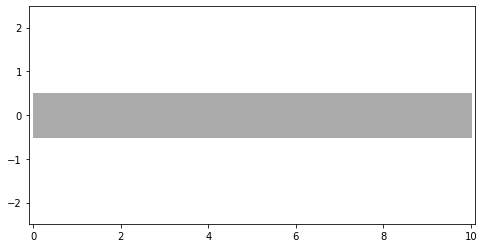

In [391]:
# Ploteo sin deformación

fig = plt.figure(figsize=(8,4))
plt.fill(BB_x, BB_y, color='#ABABAB')
plt.axis('equal')
plt.xlim(-0.1, 10.1)
plt.plot()

In [392]:
# Función de deformación

def phi(x, y):
    xx = (y + R) * np.sin(np.pi * x / L)
    yy = (y - (y + R) * (1 - np.cos(np.pi * x / L)))

    return xx, yy

In [393]:
# Creación de malla deformada

BB_XX, BB_YY = phi(BB_x,BB_y)

[]

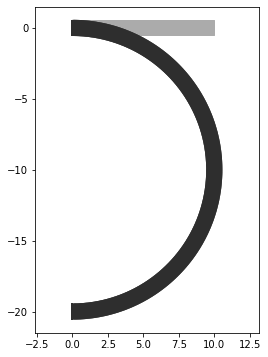

In [394]:
# Ploteo con deformación

fig = plt.figure(figsize=(4,6))
plt.plot(BB_x, BB_y, color='#ABABAB')
plt.plot(BB_XX, BB_YY, color='#2E2E2E', linewidth=2)
plt.axis('equal')
plt.ylim(-21.5, 1.5)
plt.plot()

In [395]:
# Definición de tensor gradiente de deformación

F = np.zeros((*BB_x.shape, 2, 2))
F.shape

(100, 500, 2, 2)

In [396]:
P = np.zeros(BB_x.shape)
P_11 = np.zeros(BB_x.shape)
P_12 = np.zeros(BB_x.shape)
P_21 = np.zeros(BB_x.shape)
P_22 = np.zeros(BB_x.shape)

s = np.zeros(BB_x.shape)
s_11 = np.zeros(BB_x.shape)
s_12 = np.zeros(BB_x.shape)
s_21 = np.zeros(BB_x.shape)
s_22 = np.zeros(BB_x.shape)

T_norm = np.zeros(BB_x.shape)

t_norm = np.zeros(BB_x.shape)

In [397]:
# Inverse transpose matrix

def inv_transp(A):
    return np.linalg.inv(A.transpose())

In [398]:
vec_N = np.array([1, 0])

In [399]:
# Cálculo de tensores de deformación

for i in range(len(BB_x[:, 0])):
    for j in range(len(BB_y[0, :])):
        local_x = BB_x[i, j]
        local_y = BB_y[i, j]

        # Gradiente de deformación
        local_F = np.array([
            [np.pi / L * (local_y + R) * np.cos(np.pi * local_x / L), np.sin(np.pi * local_x / L)],
            [-np.pi / L * (local_y + R) * np.sin(np.pi * local_x / L), np.cos(np.pi * local_x / L)]
        ])

        # Transpuesta de F
        local_F_t = local_F.transpose()

        # Inversa de la transpuesta de F
        local_F_it = inv_transp(local_F)

        # Determinante de F
        J = abs(np.pi / L * (local_y + R))
        
        # Logaritmo de J
        try:
            log_J = np.log(J)
        except:
            log_J = 1
        
        # Tensor de Piola Kirchoff
        local_P = mu * (local_F - local_F_it) + lambda_ * log_J * local_F_it

        P_11[i, j] = local_P[0, 0]
        P_12[i, j] = local_P[0, 1]
        P_21[i, j] = local_P[1, 0]
        P_22[i, j] = local_P[1, 1]

        # Tensor de Cauchy
        local_s = local_P @ local_F_t / J

        s_11[i, j] = local_s[0, 0]
        s_12[i, j] = local_s[0, 1]
        s_21[i, j] = local_s[1, 0]
        s_22[i, j] = local_s[1, 1]

        # Tracción material
        local_T = local_P @ vec_N

        T_norm_local = np.linalg.norm(local_T)
        T_norm[i, j] = T_norm_local

        # Tracción espacial
        vec_n = np.array([np.sin(np.pi * local_x / L), np.cos(np.pi * local_x / L)])
        local_t = local_s @ vec_n

        t_norm_local = np.linalg.norm(local_t)
        t_norm[i, j] = t_norm_local


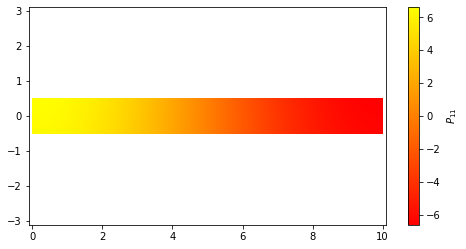

In [400]:
plt.figure(figsize=(8, 4))
fig = plt.pcolor(BB_x, BB_y, P_11, cmap='autumn', shading='auto')
plt.colorbar(fig, label = r'$P_{11}$')
plt.axis('equal')
plt.xlim(-0.1, 10.1)
plt.show()

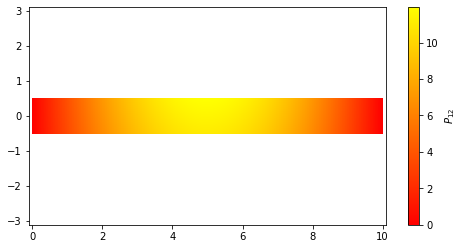

In [401]:
plt.figure(figsize=(8, 4))
fig = plt.pcolor(BB_x, BB_y, P_12, cmap='autumn', shading='auto')
plt.colorbar(fig, label = r'$P_{12}$')
plt.axis('equal')
plt.xlim(-0.1, 10.1)
plt.show()

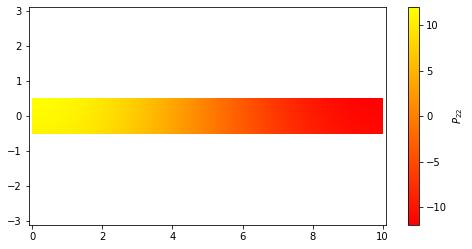

In [402]:
plt.figure(figsize=(8, 4))
fig = plt.pcolor(BB_x, BB_y, P_22, cmap='autumn', shading='auto')
plt.colorbar(fig, label = r'$P_{22}$')
plt.axis('equal')
plt.xlim(-0.1, 10.1)
plt.show()

C:\Users\ivanv\AppData\Local\Temp/ipykernel_14516/1743605250.py:2: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  fig = plt.pcolor(BB_XX, BB_YY, s_11, cmap='autumn', shading='auto')


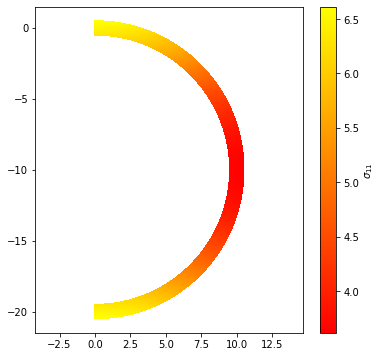

In [403]:
plt.figure(figsize=(6, 6))
fig = plt.pcolor(BB_XX, BB_YY, s_11, cmap='autumn', shading='auto')
plt.colorbar(fig, label = r'$\sigma_{11}$')
plt.axis('equal')
plt.ylim(-21.5, 1.5)
plt.show()

C:\Users\ivanv\AppData\Local\Temp/ipykernel_14516/832948599.py:2: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  fig = plt.pcolor(BB_XX, BB_YY, s_12, cmap='autumn', shading='auto')


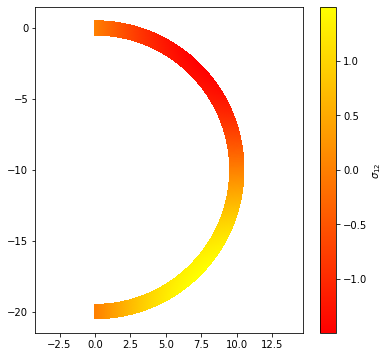

In [404]:
plt.figure(figsize=(6, 6))
fig = plt.pcolor(BB_XX, BB_YY, s_12, cmap='autumn', shading='auto')
plt.colorbar(fig, label = r'$\sigma_{12}$')
plt.axis('equal')
plt.ylim(-21.5, 1.5)
plt.show()

C:\Users\ivanv\AppData\Local\Temp/ipykernel_14516/2381355311.py:2: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  fig = plt.pcolor(BB_XX, BB_YY, s_22, cmap='autumn', shading='auto')


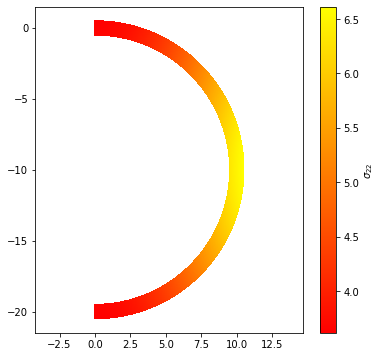

In [405]:
plt.figure(figsize=(6, 6))
fig = plt.pcolor(BB_XX, BB_YY, s_22, cmap='autumn', shading='auto')
plt.colorbar(fig, label = r'$\sigma_{22}$')
plt.axis('equal')
plt.ylim(-21.5, 1.5)
plt.show()

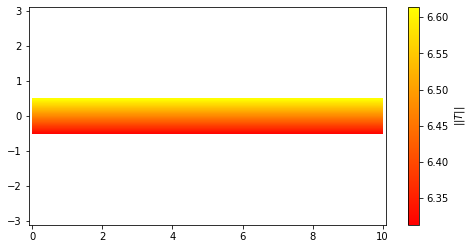

In [406]:
plt.figure(figsize=(8, 4))
fig = plt.pcolor(BB_x, BB_y, T_norm, cmap='autumn', shading='auto')
plt.colorbar(fig, label = r'$||T||$')
plt.axis('equal')
plt.xlim(-0.1, 10.1)
plt.show()

In [407]:
B_x_r = np.linspace(0, L, 20)
B_y_r = np.linspace(-h / 2, h / 2, 3)

In [408]:
BB_x_r, BB_y_r = np.meshgrid(B_x_r, B_y_r)
BB_XX_r, BB_YY_r = phi(BB_x_r,BB_y_r)

In [409]:
T = np.zeros((2, *BB_x_r.shape))
t = np.zeros((2, *BB_x_r.shape))

In [410]:
# Cálculo de tensores de deformación

for i in range(len(BB_x_r[:, 0])):
    for j in range(len(BB_y_r[0, :])):
        local_x = BB_x_r[i, j]
        local_y = BB_y_r[i, j]

        # Gradiente de deformación
        local_F = np.array([
            [np.pi / L * (local_y + R) * np.cos(np.pi * local_x / L), np.sin(np.pi * local_x / L)],
            [-np.pi / L * (local_y + R) * np.sin(np.pi * local_x / L), np.cos(np.pi * local_x / L)]
        ])

        # Inversa de la transpuesta de F
        local_F_it = inv_transp(local_F)

        # Determinante de F
        J = abs(np.pi / L * (local_y + R))
        
        # Logaritmo de J
        try:
            log_J = np.log(J)
        except:
            log_J = 1
        
        # Tensor de Piola Kirchoff
        local_P = mu * (local_F - local_F_it) + lambda_ * log_J * local_F_it

        # Tracción material
        local_T = local_P @ vec_N

        T_norm_local = np.linalg.norm(local_T)
        T[0, i, j], T[1, i, j] = local_T[0] / T_norm_local, local_T[1] / T_norm_local

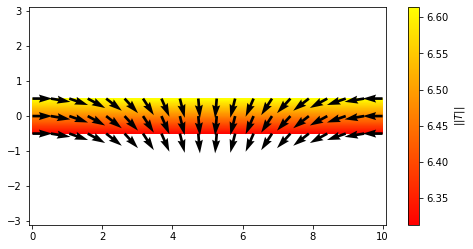

In [411]:
plt.figure(figsize=(8, 4))
fig = plt.pcolor(BB_x, BB_y, T_norm, cmap='autumn', shading='auto')
plt.quiver(BB_x_r, BB_y_r, *T, color = 'k')  # * es para desempaquetar
plt.colorbar(fig, label = r'$||T||$')
plt.axis('equal')
plt.xlim(-0.1, 10.1)
plt.show()

C:\Users\ivanv\AppData\Local\Temp/ipykernel_14516/3657847616.py:2: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  fig = plt.pcolor(BB_XX, BB_YY, t_norm, cmap='autumn', shading='auto')


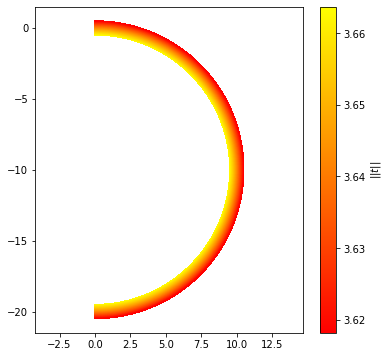

In [412]:
plt.figure(figsize=(6, 6))
fig = plt.pcolor(BB_XX, BB_YY, t_norm, cmap='autumn', shading='auto')
plt.colorbar(fig, label = r'$||t||$')
plt.axis('equal')
plt.ylim(-21.5, 1.5)
plt.show()

In [413]:
# Cálculo de tensores de deformación

for i in range(len(BB_x_r[:, 0])):
    for j in range(len(BB_y_r[0, :])):
        local_x = BB_x_r[i, j]
        local_y = BB_y_r[i, j]

        # Gradiente de deformación
        local_F = np.array([
            [np.pi / L * (local_y + R) * np.cos(np.pi * local_x / L), np.sin(np.pi * local_x / L)],
            [-np.pi / L * (local_y + R) * np.sin(np.pi * local_x / L), np.cos(np.pi * local_x / L)]
        ])

        # Transpuesta de F
        local_F_t = local_F.transpose()

        # Inversa de la transpuesta de F
        local_F_it = inv_transp(local_F)

        # Determinante de F
        J = abs(np.pi / L * (local_y + R))
        
        # Logaritmo de J
        try:
            log_J = np.log(J)
        except:
            log_J = 1
        
        # Tensor de Piola Kirchoff
        local_P = mu * (local_F - local_F_it) + lambda_ * log_J * local_F_it

        # Tensor de Cauchy
        local_s = local_P @ local_F_t / J

        # Tracción espacial
        vec_n = np.array([np.sin(np.pi * local_x / L), np.cos(np.pi * local_x / L)])
        local_t = local_s @ vec_n

        t_norm_local = np.linalg.norm(local_t)
        t_norm[i, j] = t_norm_local
        t[0, i, j], t[1, i, j] = local_t[0] / t_norm_local, local_t[1] / t_norm_local

C:\Users\ivanv\AppData\Local\Temp/ipykernel_14516/774459047.py:2: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  fig = plt.pcolor(BB_XX, BB_YY, t_norm, cmap='autumn', shading='auto')


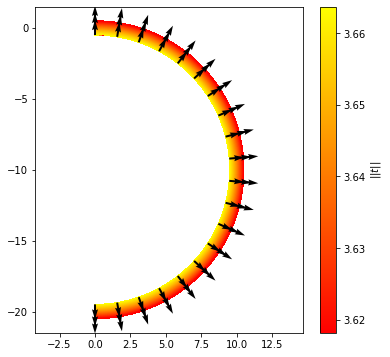

In [414]:
plt.figure(figsize=(6, 6))
fig = plt.pcolor(BB_XX, BB_YY, t_norm, cmap='autumn', shading='auto')
plt.quiver(BB_XX_r, BB_YY_r, *t, color = 'k')  # * es para desempaquetar
plt.colorbar(fig, label = r'$||t||$')
plt.axis('equal')
plt.ylim(-21.5, 1.5)
plt.show()

#### Hecho con :heart: por Iván Vergara Lam